# Kentucky Elections

### Source Data

The New York Times.

- [2019 - Kentucky Governor Election Results](https://www.nytimes.com/interactive/2019/11/05/us/elections/results-kentucky-governor-general-election.html)
- [2016 - Kentucky Presidential Election Results](https://www.nytimes.com/elections/2016/results/kentucky)
- [2016 - Kentucky Presidential Primary Results](https://www.nytimes.com/elections/2016/results/primaries/kentucky)

Data is in the source in JSON format, pulled out and prettified. 

In [1]:
import json
import numpy as np
import pandas as pd
import seaborn as sns
import os
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline

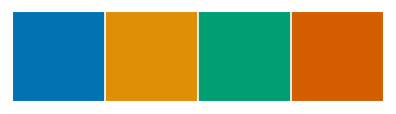

In [2]:
# Do not join cells.
# https://stackoverflow.com/questions/332289/how-do-you-change-the-size-of-figures-drawn-with-matplotlib#comment87590438_41717533
sns.set();
# 
sns.set(rc={
    'axes.labelsize': 18,
    'axes.titlesize': 20,
    'figure.figsize': (11, 8.5),
    'figure.dpi': 120,
    "figure.facecolor": "w",
    "figure.edgecolor": "k",
});

current_palette = sns.color_palette("colorblind", 4);
sns.palplot(current_palette);

In [3]:
# Load the data
with open("kentucky_primary_2016.json", "rb") as fid:
    kentucky_primary_2016= json.load(fid)
kentucky_primary_2016_gop = kentucky_primary_2016[0]
kentucky_primary_2016_dnc = kentucky_primary_2016[1]
with open("kentucky_general_2016.json", "rb") as fid:
    kentucky_general_2016 = json.load(fid)
with open("kentucky_governor_2019.json", "rb") as fid:
    kentucky_governor_2019= json.load(fid)

In [4]:
# Despite ranking 37th in size by area, Kentucky has 120 counties;
# Source: Wiki.
# Sanity Check.
assert len(kentucky_primary_2016_gop["counties"]) == 120
assert len(kentucky_primary_2016_dnc["counties"]) == 120
assert len(kentucky_general_2016[0]["counties"]) == 120
assert len(kentucky_primary_2016_dnc["counties"]) == 120

In [5]:
# Merge the data.
results = dict()
# For each county in the governor's race
for county in kentucky_governor_2019["counties"]:
    # Create an empty dict for the county name.
    results[county["name"]]=dict()
    # Copy the FIPS
    results[county["name"]]["fips"]=county["fips"]
    # Loop through each candidate
    for candidate, votes in county["results"].items():
        results[county["name"]][candidate]=votes
    # Sum up the results.
    results[county["name"]]["total_2019"] = np.sum([value for key, value in county["results"].items()])

# For each county in the 2016 presidential general election:
for county in kentucky_general_2016[0]["counties"]:
    for candidate, votes in county["results"].items():
        results[county["name"]][candidate]=votes
    # Sum the total votes.
    results[county["name"]]["total_2016"] = np.sum([value for key, value in county["results"].items()])

# For each county in the 2016 primary, GOP candidates:
for county in kentucky_primary_2016_gop["counties"]:
    # For each result.
    for candidate, votes in county["results"].items():
        # Add the votes to the results
        results[county["name"]][candidate]=votes
    results[county["name"]]["total_gop_primary"] = np.sum([value for key, value in county["results"].items()])

# For each county in the 2016 primary, DNC candidates:
for county in kentucky_primary_2016_dnc["counties"]:
    # For each result.
    for candidate, votes in county["results"].items():
        # Add the votes to the results.
        results[county["name"]][candidate]=votes
    results[county["name"]]["total_dnc_primary"] = np.sum([value for key, value in county["results"].items()])
        
# Dataframe
df = pd.DataFrame(results).transpose()

In [6]:
df

,fips,bevinm,besheara,hicksj,total_2019,trumpd,clintonh,johnsong,mcmulline,steinj,...,santorum-1752-president,fiorina-60339-president,huckabee-1187-president,uncommitted-100004-president,total_gop_primary,clinton-1746-president,sanders-1445-president,omalley-22603-president,de-la-fuente-64542-president,total_dnc_primary
Adair,21001,3946,1626,99,5671,6637,1323,141,92,35,...,1,0,0,43,2616,466,410,18,2,939
Allen,21003,3564,1649,96,5309,6466,1349,161,63,46,...,1,2,8,50,1508,427,440,5,6,928
Anderson,21005,5143,3810,220,9173,8242,2634,319,165,54,...,0,2,5,267,1681,1132,1649,74,22,3144
Ballard,21007,2010,1012,54,3076,3161,816,77,23,20,...,0,0,0,169,319,405,659,34,0,1267
Barren,21009,7693,5280,256,13229,13483,4275,455,167,93,...,1,1,2,568,2312,1979,2653,97,23,5320
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Wayne,21231,3472,1983,90,5545,6371,1431,116,41,30,...,0,1,5,25,1675,502,356,13,7,903
Webster,21233,2271,1495,90,3856,4397,1240,111,34,22,...,0,0,0,468,235,693,1169,65,16,2411
Whitley,21235,6672,2995,218,9885,11312,2067,242,103,41,...,0,0,8,47,3292,522,409,12,4,994
Wolfe,21237,958,1194,39,2191,1804,753,42,26,9,...,0,0,0,58,96,414,499,2,11,984


In [7]:
name_map = {
    "bevinm": "Bevin",
    "besheara": "Beshear",
    "trumpd": "Trump",
    "clintonh": "Clinton",
    "clinton-1746-president": "Clinton_Primary",
    "sanders-1445-president": "Sanders_Primary",
}
for name, new_name in  name_map.items():
    df[new_name] = df[name]

## Calculated Columns

1. Trump:Clinton ratio.
  Ratio of Trump to Clinton votes.
  - \>1 Counties Trump Won
  - <1 Counties Clinton Won.
  $$ \frac{Trump Votes}{Clinton Votes}$$
  
1. Bevin:Bashear ratio.
  Ratio of Bevin to Bashear votes.
  - \>1 Counties Bevin Won
  - <1 Counties Bashear Won.
    $$ \frac{Bevin Votes}{Bashear Votes}$$
    
1. Trump-Clinton ratio.
  Absolute number of votes Trump recieved more than Clinton. Negative numbers indicate counties where Clinton won.
  $$ Trump Votes - Clinton Votes$$
  
1. Bevin:Bashear ratio.
  Absolute number of votes Bevin recieved more than Bashear. Negative numbers indicate counties where Bashear won.
  $$ Bevin Votes-Bashear Votes$$

In [8]:
df["clinton_to_sanders"]=df.Clinton_Primary/df.Sanders_Primary
df["trump_to_clinton"]=df.Trump/df.Clinton
df["bevin_to_beshear"]=df.Bevin/df.Beshear
df["trump_sub_clinton"]=df.Trump-df.Clinton
df["bevin_sub_beshear"]=df.Bevin-df.Beshear
df["bevin_sub_beshear"]=df.Bevin-df.Beshear
df["bevin_sub_beshear"]=df.Bevin-df.Beshear

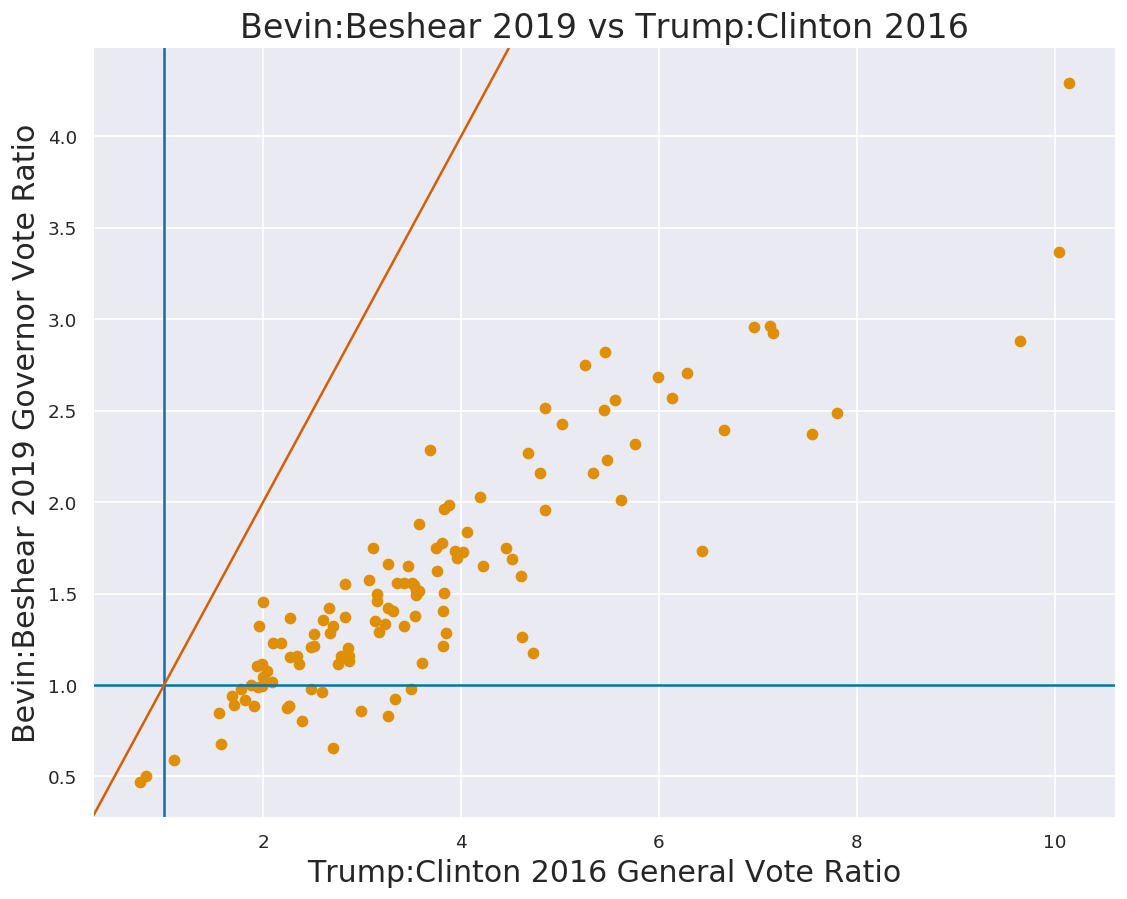

In [9]:
ax = plt.scatter(df.trump_to_clinton, df.bevin_to_beshear, color=current_palette[1])
bounds = ax.axes.axis()
plt.axvline(x=1, color=current_palette[0])
plt.axhline(y=1, color=current_palette[0])
plt.plot([0,12], [0, 12], color=current_palette[3])
plt.title("Bevin:Beshear 2019 vs Trump:Clinton 2016")
plt.xlabel("Trump:Clinton 2016 General Vote Ratio");
plt.ylabel("Bevin:Beshear 2019 Governor Vote Ratio");
plt.axis(bounds);
# Save
plt.savefig("Win_Ratio_Comparison.png", transparent=False)

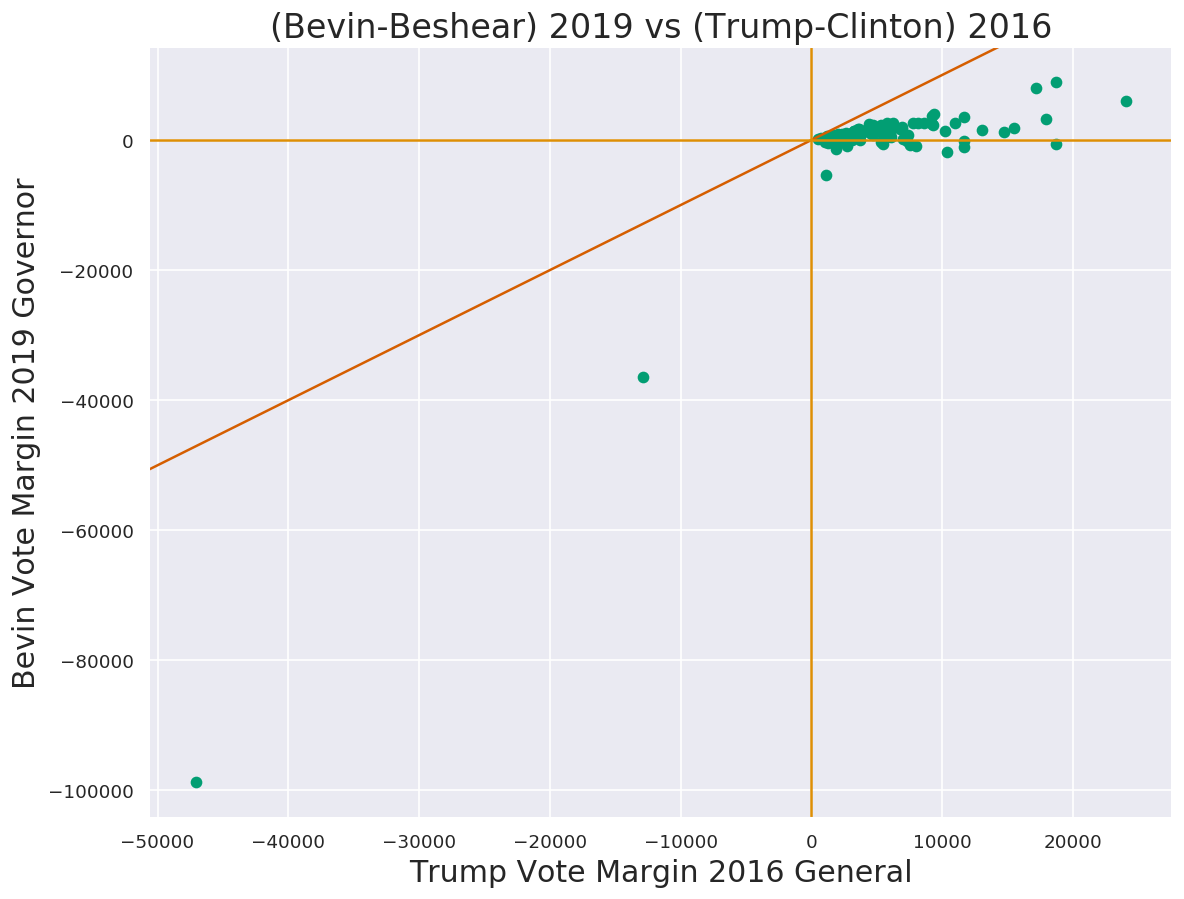

In [10]:
ax = plt.scatter(df.trump_sub_clinton, df.bevin_sub_beshear, color=current_palette[2])
bounds = ax.axes.axis()
plt.plot([min(bounds), max(bounds)], [min(bounds), max(bounds)], color=current_palette[3])
plt.axvline(x=0, color=current_palette[1])
plt.axhline(y=0, color=current_palette[1])
plt.title("(Bevin-Beshear) 2019 vs (Trump-Clinton) 2016")
plt.xlabel("Trump Vote Margin 2016 General");
plt.ylabel("Bevin Vote Margin 2019 Governor");
plt.axis(bounds);
# Save
plt.savefig("Win_Margin_Comparison.png", transparent=False)

In [11]:
df[df.trump_sub_clinton < -10000]
# Lulville & UK.

,fips,bevinm,besheara,hicksj,total_2019,trumpd,clintonh,johnsong,mcmulline,steinj,...,Beshear,Trump,Clinton,Clinton_Primary,Sanders_Primary,clinton_to_sanders,trump_to_clinton,bevin_to_beshear,trump_sub_clinton,bevin_sub_beshear
Fayette,21067,36915,73397,1719,112031,56894,69778,5230,2636,1580,...,73397,56894,69778,20014,17048,1.17398,0.815357,0.50295,-12884,-36482
Jefferson,21111,87738,186510,4170,278418,143768,190836,10188,4785,3224,...,186510,143768,190836,64090,45048,1.4227,0.753359,0.47042,-47068,-98772


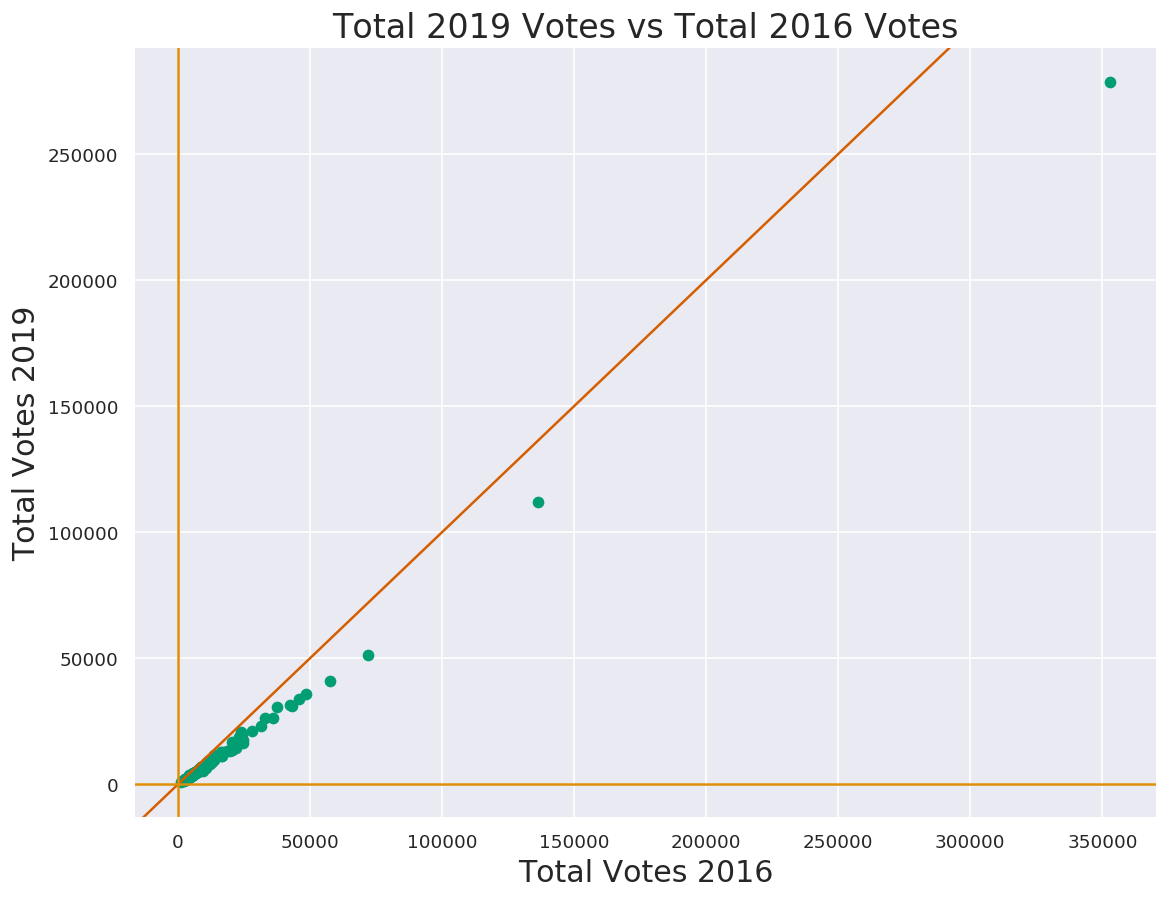

In [12]:
ax = plt.scatter(df.total_2016, df.total_2019, color=current_palette[2])
bounds = ax.axes.axis()
plt.plot([min(bounds), max(bounds)], [min(bounds), max(bounds)], color=current_palette[3])
plt.axvline(x=0, color=current_palette[1])
plt.axhline(y=0, color=current_palette[1])
plt.title("Total 2019 Votes vs Total 2016 Votes")
plt.xlabel("Total Votes 2016");
plt.ylabel("Total Votes 2019");
plt.axis(bounds);
# Save
plt.savefig("Total_Votes_Comparison.png", transparent=False)

In [13]:
df.total_2019-df.total_2016

Adair       -2562
Allen       -2787
Anderson    -2249
Ballard     -1025
Barren      -5259
            ...  
Wayne       -2447
Webster     -1949
Whitley     -3889
Wolfe        -444
Woodford    -1824
Length: 120, dtype: object

# Enhance

Zoom in on the good data.

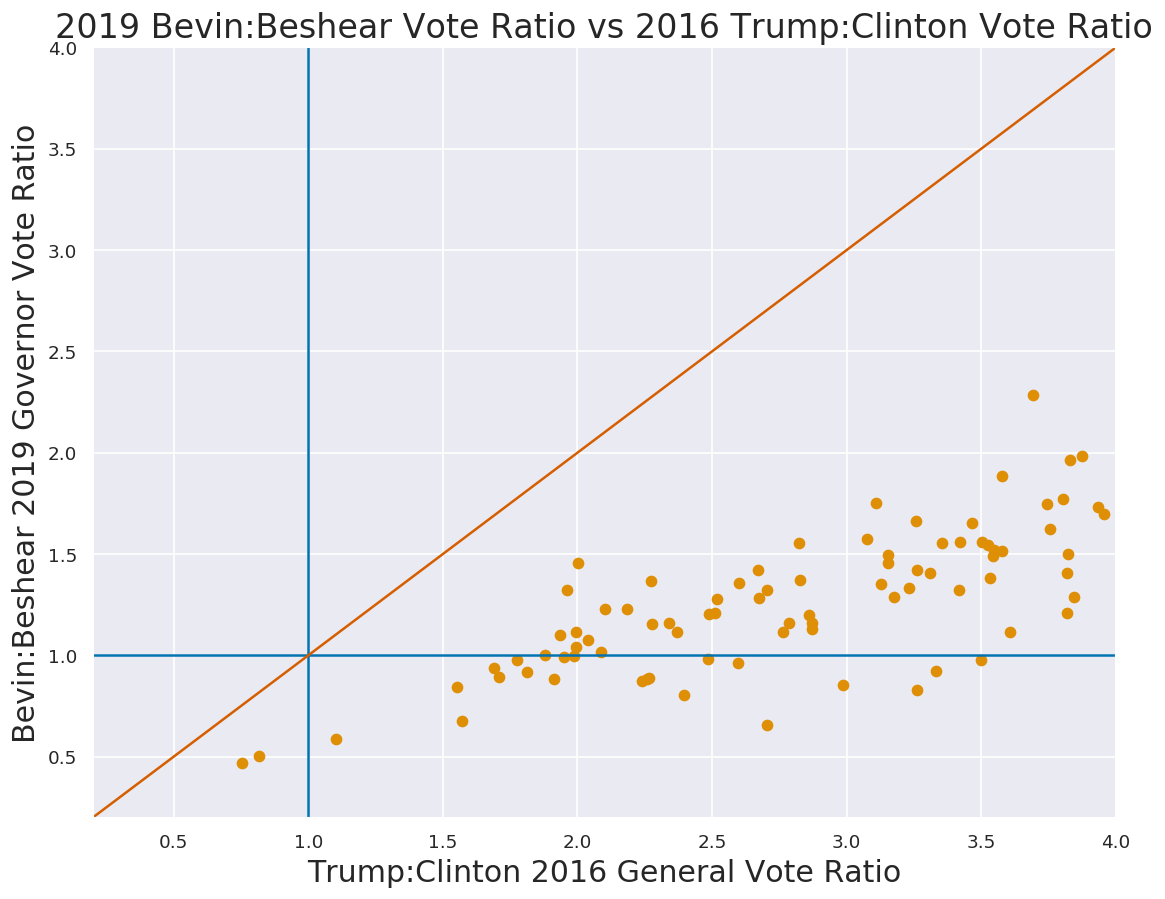

In [14]:
ax = plt.scatter(df.trump_to_clinton, df.bevin_to_beshear, color=current_palette[1])
plt.axvline(x=1, color=current_palette[0])
plt.axhline(y=1, color=current_palette[0])
plt.title("2019 Bevin:Beshear Vote Ratio vs 2016 Trump:Clinton Vote Ratio")
plt.xlabel("Trump:Clinton 2016 General Vote Ratio");
plt.ylabel("Bevin:Beshear 2019 Governor Vote Ratio");
# 1:1 line.
plt.plot([0,12], [0, 12], color=current_palette[3])
# Square the plot.
plt.axis([0.2, 4, 0.2, 4]);
plt.savefig("WinRatio_Square.png", transparent=False)

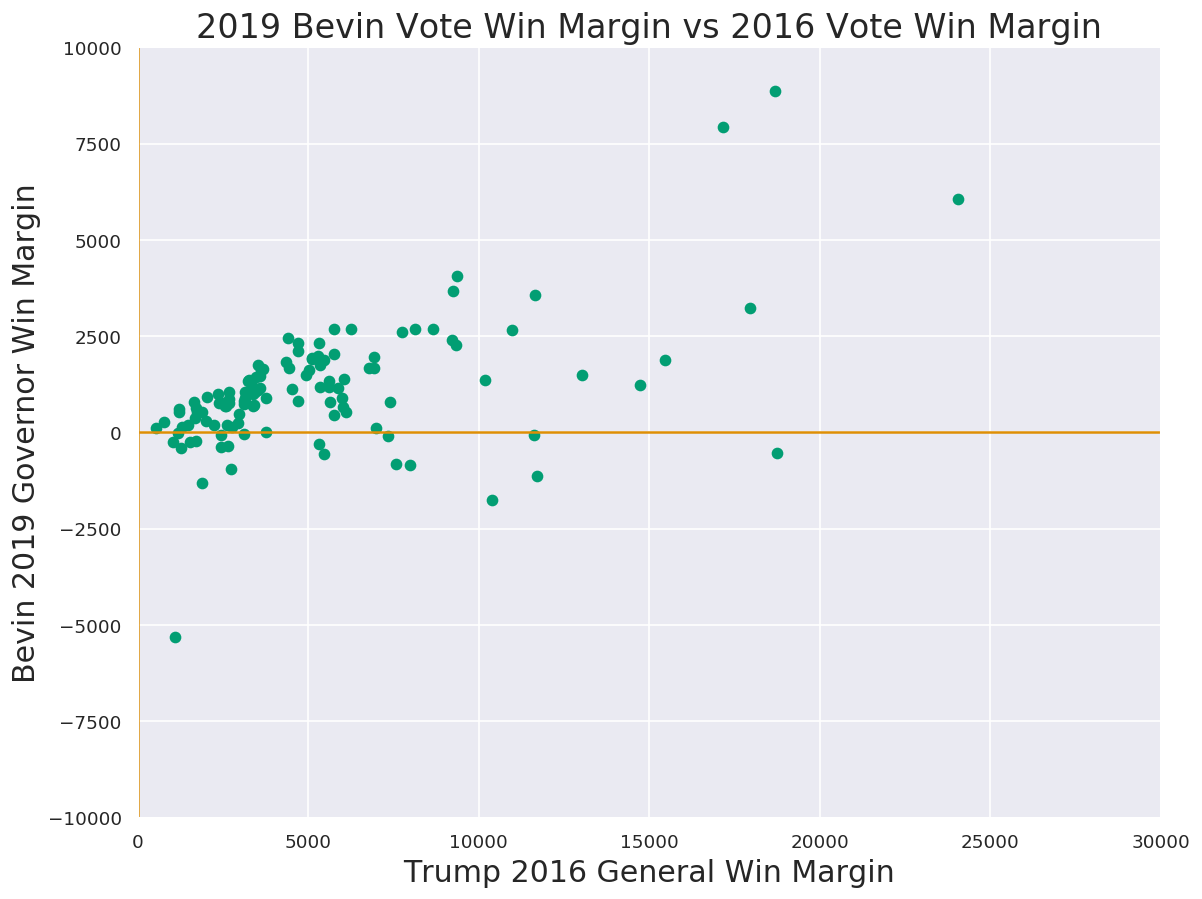

In [15]:
ax = plt.scatter(df.trump_sub_clinton, df.bevin_sub_beshear, color=current_palette[2])
plt.axvline(x=0, color=current_palette[1])
plt.axhline(y=0, color=current_palette[1])
plt.title("2019 Bevin Vote Win Margin vs 2016 Vote Win Margin")
plt.xlabel("Trump 2016 General Win Margin");
plt.ylabel("Bevin 2019 Governor Win Margin");
# Remove Louisville & Lexington.
plt.axis([0, 30000, -10000, 10000]);
plt.savefig("Win_Margin_Comparison_Zoomed.png", transparent=False)

# Number Inspections

In [16]:
# Narrow down the data.
relevant_columns = ["bevinm", "besheara", "trumpd", "clintonh", "bevin_to_beshear", "trump_to_clinton", "bevin_sub_beshear", "trump_sub_clinton","total_2016", "total_2019"]

### Flipped Counties Trump won by 10,000+ votes

In [17]:
trump_plus_10k = df[(df.trump_sub_clinton>10000) & (df.bevin_sub_beshear<0.0)][relevant_columns];
trump_plus_10k.sort_values(by=["bevin_sub_beshear"])

,bevinm,besheara,trumpd,clintonh,bevin_to_beshear,trump_to_clinton,bevin_sub_beshear,trump_sub_clinton,total_2016,total_2019
Campbell,14587,16352,25050,14658,0.892062,1.70896,-1765,10392,42510,31577
Warren,17118,18249,28673,16966,0.938024,1.69003,-1131,11707,48454,35925
Kenton,24936,25479,42958,24214,0.978688,1.7741,-543,18744,71998,51497
Madison,14943,15017,23431,11793,0.995072,1.98686,-74,11638,37371,30665


### Flipped Counties where Trump had >2 win ratio

Sorted in ascending order of Trumps win ratio.

In [18]:
df[(df.trump_to_clinton>2.0) & (df.bevin_to_beshear<1.0)][relevant_columns].sort_values(by=["trump_to_clinton"])

,bevinm,besheara,trumpd,clintonh,bevin_to_beshear,trump_to_clinton,bevin_sub_beshear,trump_sub_clinton,total_2016,total_2019
Hancock,1650,1891,2788,1244,0.872554,2.24116,-241,1544,4295,3654
Boyd,6182,6989,13591,6021,0.884533,2.25727,-807,7570,20454,13502
Bath,1672,1886,3082,1361,0.886532,2.26451,-214,1721,4587,3628
Wolfe,958,1194,1804,753,0.802345,2.39575,-236,1051,2635,2191
Nicholas,1134,1157,1957,787,0.980121,2.48666,-23,1170,2841,2338
Breathitt,1820,1889,3991,1537,0.963473,2.59662,-69,2454,5738,3762
Elliott,752,1148,2000,740,0.655052,2.7027,-396,1260,2855,1942
Floyd,5048,5903,11993,4015,0.855158,2.98705,-855,7978,16540,11230
Magoffin,1629,1968,3824,1172,0.827744,3.2628,-339,2652,5116,3674
Carter,3442,3732,7587,2276,0.922294,3.33348,-290,5311,10278,7401


In [19]:
# The above not in one line, for intermediate results or learning.
logical = (df.trump_to_clinton>2.0) & (df.bevin_to_beshear<1.0)
df2=df[logical]
df3=df2[relevant_columns]
df4=df3.sort_values(by=["trump_to_clinton"])

Direct comparison of the ```Trump:Clinton``` win ratio to ```Bevin:Beshear``` and ```Trump-Clinton``` margin vs ```Bevin-Beshear``` margin.

In [20]:
df["TtCtBtB"]=df.trump_to_clinton/df.bevin_to_beshear
df["TtCsBtB"]=df.trump_to_clinton-df.bevin_to_beshear
df["TsCsBsB"]=df.trump_sub_clinton-df.bevin_sub_beshear
relevant_columns.append("TtCtBtB")
relevant_columns.append("TtCsBtB")
relevant_columns.append("TsCsBsB")

In [21]:
df.sort_values(by=["TtCtBtB"], ascending=False)[relevant_columns][0:5]

,bevinm,besheara,trumpd,clintonh,bevin_to_beshear,trump_to_clinton,bevin_sub_beshear,trump_sub_clinton,total_2016,total_2019,TtCtBtB,TtCsBtB,TsCsBsB
Elliott,752,1148,2000,740,0.655052,2.7027,-396,1260,2855,1942,4.12593,2.04765,1656
Letcher,3089,2626,7293,1542,1.17631,4.72957,463,5751,9134,5854,4.02067,3.55326,5288
Magoffin,1629,1968,3824,1172,0.827744,3.2628,-339,2652,5116,3674,3.9418,2.43505,2991
Johnson,3988,2304,8043,1250,1.7309,6.4344,1684,6793,9572,6484,3.71737,4.7035,5109
Pike,9011,7131,19747,4280,1.26364,4.61379,1880,15467,24665,16608,3.65119,3.35015,13587


In [22]:
df.sort_values(by=["TtCsBtB"], ascending=False)[relevant_columns][0:5]

,bevinm,besheara,trumpd,clintonh,bevin_to_beshear,trump_to_clinton,bevin_sub_beshear,trump_sub_clinton,total_2016,total_2019,TtCtBtB,TtCsBtB,TsCsBsB
Martin,1596,554,3503,363,2.88087,9.65014,1042,3140,3953,2205,3.34973,6.76927,2098
Leslie,2289,680,4015,400,3.36618,10.0375,1609,3615,4492,3020,2.98187,6.67132,2006
Jackson,3214,749,4889,482,4.29105,10.1432,2465,4407,5501,4049,2.36379,5.8521,1942
Clay,3225,1298,5861,752,2.48459,7.79388,1927,5109,6767,4619,3.13689,5.30929,3182
McCreary,3181,1340,5012,664,2.37388,7.54819,1841,4348,5776,4647,3.17969,5.17431,2507


### Top 15 Counties for GOP Vote Losses

In [23]:
df.sort_values(by=["TsCsBsB"], ascending=False)[relevant_columns][0:15]

,bevinm,besheara,trumpd,clintonh,bevin_to_beshear,trump_to_clinton,bevin_sub_beshear,trump_sub_clinton,total_2016,total_2019,TtCtBtB,TtCsBtB,TsCsBsB
Jefferson,87738,186510,143768,190836,0.47042,0.753359,-98772,-47068,353099,278418,1.60146,0.282939,51704
Fayette,36915,73397,56894,69778,0.50295,0.815357,-36482,-12884,136315,112031,1.62115,0.312408,23598
Kenton,24936,25479,42958,24214,0.978688,1.7741,-543,18744,71998,51497,1.81273,0.795409,19287
Boone,23000,16947,39082,15026,1.35717,2.60096,6053,24056,57618,40917,1.91645,1.24379,18003
Bullitt,14517,11275,26210,8255,1.28754,3.17505,3242,17955,36069,26492,2.46598,1.88751,14713
Pike,9011,7131,19747,4280,1.26364,4.61379,1880,15467,24665,16608,3.65119,3.35015,13587
Daviess,17238,16013,28907,14163,1.0765,2.04102,1225,14744,45807,34056,1.89598,0.964522,13519
Warren,17118,18249,28673,16966,0.938024,1.69003,-1131,11707,48454,35925,1.80169,0.752003,12838
Campbell,14587,16352,25050,14658,0.892062,1.70896,-1765,10392,42510,31577,1.91575,0.816902,12157
Madison,14943,15017,23431,11793,0.995072,1.98686,-74,11638,37371,30665,1.9967,0.991784,11712
